In [24]:
# Load libraries
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import random
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import shap
import xgboost as xgb
import re
from scipy import stats
import os

seed = 0
deterministic = True

random.seed(seed)
np.random.seed(seed)
dataframe= pandas.read_csv('metadata/Census_income.csv')
D = 4
PERCENT = 75
FEAT_NUM = len(dataframe.columns)-1

In [25]:
dataframe.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382,0.064207,0.000205,0.751505,0.034704,0.079071,...,0.020126,0.112690,0.029606,0.048217,0.257627,0.030834,0.155215,0.104930,0.047725,0.239282
std,13.710510,2.570973,7452.019058,403.004552,12.391444,0.245124,0.014307,0.432145,0.183030,0.269853,...,0.140433,0.316217,0.169499,0.214226,0.437332,0.172870,0.362113,0.306467,0.213187,0.426649
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
### Slicing data ###

X = dataframe.iloc[:, 0:FEAT_NUM].values
y = dataframe.iloc[:, FEAT_NUM].values
# Split train/test by 8:2. msk refers to the indices of the training data. Will be used for indexing Concepts
df = pandas.DataFrame(np.random.randn(dataframe.shape[0], 2))
msk = np.random.rand(len(df)) < 0.8
X_train, y_train = X[msk], y[msk]
X_test, y_test = X[~msk], y[~msk]

#Save original training data for computing values
X_train_og =  dataframe.iloc[msk, 0:FEAT_NUM]
y_train_og =  dataframe.iloc[msk, FEAT_NUM]

# Decision tree performance

In [27]:
dt = DecisionTreeClassifier(criterion = "gini",
                               max_depth=5, min_samples_leaf=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(f"Decision Tree using Gini Index\nAccuracy is {accuracy_score(y_test,y_pred_dt)*100} f1 {f1_score(y_test,y_pred_dt)*100}","\n\nPrecision Value is\n", classification_report(y_test,y_pred_dt))

Decision Tree using Gini Index
Accuracy is 85.41538461538461 f1 62.87206266318537 

Precision Value is
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7485
           1       0.77      0.53      0.63      2265

    accuracy                           0.85      9750
   macro avg       0.82      0.74      0.77      9750
weighted avg       0.85      0.85      0.84      9750



In [28]:
### Desicion Tree with Gini Index ###
dt_clf_gini = RandomForestClassifier(criterion = "gini",
                               max_depth=5, min_samples_leaf=5,n_estimators=5)
dt_clf_gini.fit(X_train, y_train)
### Desicion Tree with Information Gain ###

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=5)

 #### Now Predicting data on both classifiers using the test values

#### --> Accuracy Scores And Precision value

In [29]:
y_pred_gini = dt_clf_gini.predict(X_test)
print(f"Decision Tree using Gini Index\nAccuracy is {accuracy_score(y_test,y_pred_gini)*100} f1 {f1_score(y_test,y_pred_gini)*100}","\n\nPrecision Value is\n", classification_report(y_test,y_pred_gini))


Decision Tree using Gini Index
Accuracy is 84.88205128205128 f1 59.52773201537618 

Precision Value is
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      7485
           1       0.79      0.48      0.60      2265

    accuracy                           0.85      9750
   macro avg       0.82      0.72      0.75      9750
weighted avg       0.84      0.85      0.83      9750



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


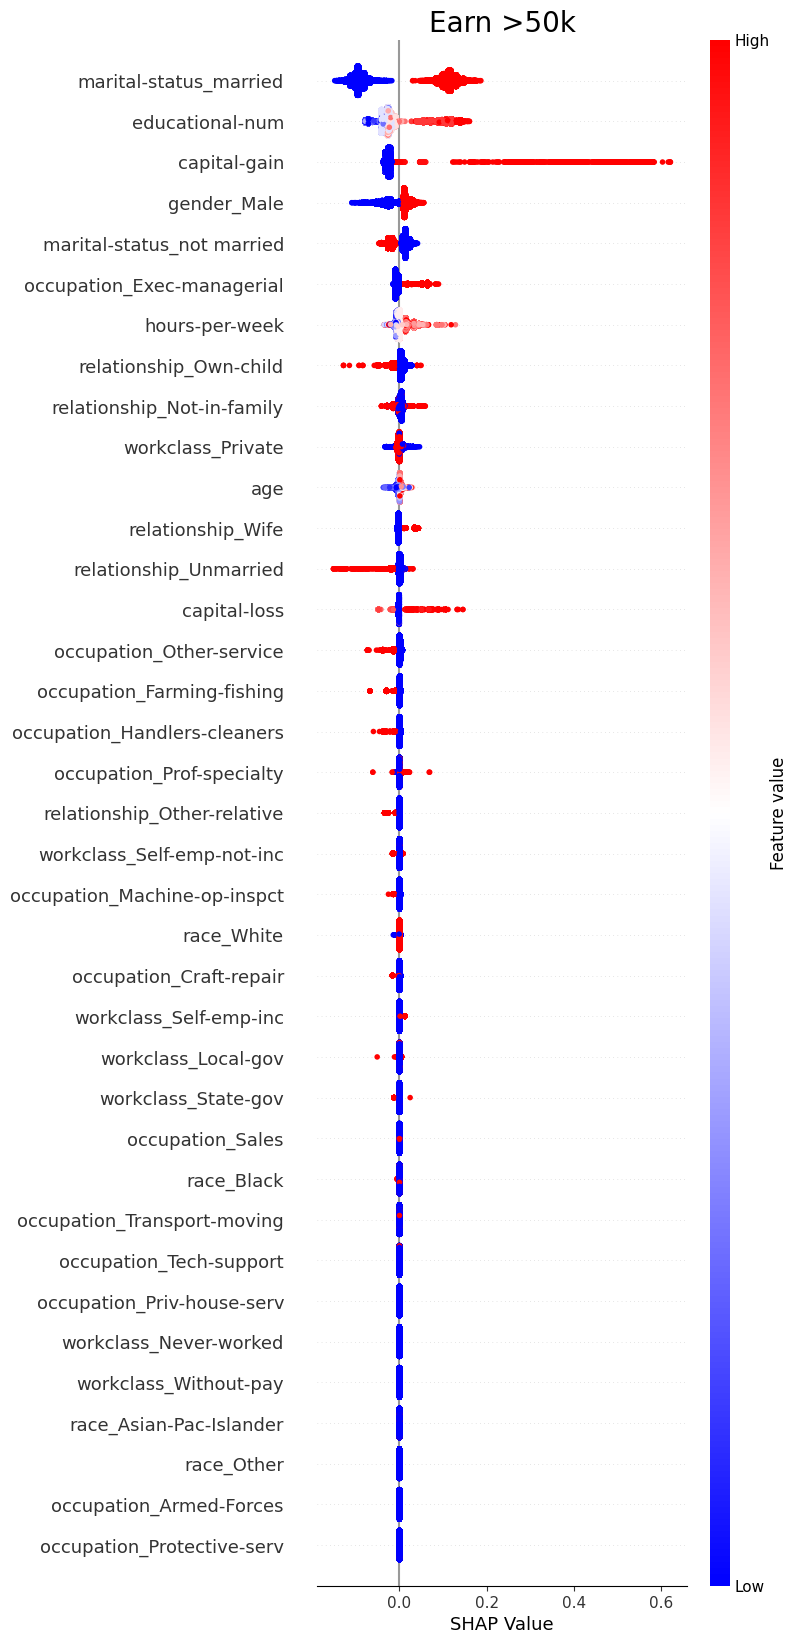

<Figure size 640x480 with 0 Axes>

In [30]:
rf_explainer = shap.TreeExplainer(dt_clf_gini, X_train)
rf_shap_values = rf_explainer.shap_values(X_train)
plt.tight_layout()
plt.rcParams['axes.unicode_minus'] = False
shap.summary_plot(rf_shap_values[1], X_train,
                  feature_names=dataframe.columns, 
                 cmap='bwr', show=False,max_display=len(dataframe.columns),sort=True)
plt.xlabel('SHAP Value')
plt.title('Earn >50k', fontsize=20)
plt.show()
plt.savefig('shap/Census_income_rf.png',bbox_inches='tight')


# Concept Extraction

In [31]:
# find path to the node by its node_numb
def find_path(node_numb, path, x):
        path.append(node_numb)
        if node_numb == x:
            return True
        left = False
        right = False
        if (children_left[node_numb] !=-1):
            left = find_path(children_left[node_numb], path, x)
        if (children_right[node_numb] !=-1):
            right = find_path(children_right[node_numb], path, x)
        if left or right :
            return True
        path.remove(node_numb)
        return False

# Given path information, get the rule
def get_rule(path, column_names):
    mask = ''
    for index, node in enumerate(path):
        #We check if we are not in the leaf
        if index!=len(path)-1:
            # Do we go under or over the threshold ?
            if (children_left[node] == path[index+1]):
                mask += f"(dataframe['{column_names[feature[node]]}']<= {threshold[node]}) \t "
            else:
                mask += f"(dataframe['{column_names[feature[node]]}']> {threshold[node]}) \t "
    # We insert the & at the right places
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "")
    return mask

# compute node entropy
def gini(a):
    p1 = float(sum(a)/len(a))
    p2 = float((len(a)-sum(a))/len(a))
    return 1-p1**2-p2**2

# Compute the gini index, support of the rule, proprtion wrt to the support, depth of the tree
def compute_gini_size(rule):
    rule = rule.replace("dataframe","X_train_og")
    depth = rule.count('&') +1
    concept = 'c1 = '+rule
    exec(concept,globals())
    x = y_train_og[c1]
    return 1-gini(x), len(x), float(sum(x))/len(x)*100, depth 

# Concept Extraction

In [32]:
rules = set() #set of rules
rule_entropy_dict = dict() # entropy for each rule
rule_depth = dict() # depth for each rule
rule_sample_num = dict() # sample number per rule
rule_pos_neg = dict() # The percentage of positive label wrt to the support 

#iterate each tree
for tree in dt_clf_gini.estimators_:
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    
    # compute if leaf
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth
        #n_node_samples[i]
        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True
    l = list()
    for node in range(1,n_nodes):
        if node_depth[node] <= D:
            l.append(node)
    paths ={}
    for node in np.unique(l):
        path = []
        find_path(0, path, node)
        paths[node] = np.unique(np.sort(path))
        rule = get_rule(paths[node], dataframe.columns)
        rules.add(rule)
        if not rule in rule_entropy_dict: 
            impurity,sample_size,percent,depth = compute_gini_size(rule)
            rule_entropy_dict[rule] = impurity
            rule_depth[rule] = depth
            rule_sample_num[rule] = sample_size
            rule_pos_neg[rule] = percent
rules = sorted(rules)


In [33]:
# Sort the rules by impurity
rule_entropy_dict = {k: v for k, v in sorted(rule_entropy_dict.items(), key=lambda item: item[1],reverse=True)}
#Compute the percentage of the rules
TOPK = int(len(rules) * PERCENT*0.01)
score_dict = dict()
for rule in rules:
    score_dict[rule] = rule_entropy_dict[rule]*rule_sample_num[rule]
# Extract top k% of the rules by score
rules = list(score_dict.keys())[:TOPK]
print(f'Number of rules extracted {len(rules)}')

Number of rules extracted 108


## Convert rules to explanations

In [34]:
explanations = [] # List of simplified rules
ordinal = ['age','educational-num','capital-gain','capital-loss','hours-per-week'] # Non binary, ordinal features
for i in range(len(rules)):
    rule = rules[i]
    posneg = rule_pos_neg[rule]
    score = score_dict[rule]
    features = re.findall("'([^']*)'", rule)
    thresholds = re.findall("\d+\.\d+", rule)
    rule = rule.replace("dataframe","X_train_og")
    command = 'c1 = '+rule
    exec(command)
    group = X_train_og[c1]
    total_percentage = (len(group)/len(dataframe)*100)
    explanation = f'Population: {total_percentage:.1f}% positive:{posneg:.1f}% score: {score/max(score_dict.values()):.1f}'
    r = rule.split('&')
    for j,f in enumerate(r):
        command = f'c1 = {f}'
        exec(command)
        group = X_train_og[c1]
        if features[j] in ordinal:
            #Given a threshold, compute the percentile of the feature value belongs to.
            # Ex) education > 12: 10 means that 10% of the data points have education > 12
            # Ex2) education <=12: 90 means that 90% of the data points have education <=12 
            percentile = stats.percentileofscore(X_train_og[features[j]], float(thresholds[j]),'weak')
            if '>' in f:
                percentile = 100-percentile 
                explanation += f' ({features[j]}>{float(thresholds[j]):.1f}: P_{percentile:.1f})'
            else:
                explanation += f' ({features[j]}<={float(thresholds[j]):.1f}: P_{percentile:.1f})'
        
        else:
            percentage = len(group)/len(dataframe)*100
            if '>' in f:
                explanation += f' ({features[j]} True: {percentage:.1f}%)'
            else:
                explanation += f' ({features[j]} False: {percentage:.1f}%)'
    explanations.append(explanation)


In [35]:
# For each row, create a new input for the Concept Network.
## if the row belongs to a concept, it is labelled 1 and 0 otherwise.
cur_len = len(rules)
concepts = list()
for rule in rules:
    concept = 'c1 = '+rule
    exec(concept)
    c1 = c1.astype(float)
    c1 = list(c1)
    concepts.append(c1)        
l = list()
for i in range(len(concepts[0])):
    tmp = list()
    for c in concepts:
        tmp.append(c[i])
    l.append(tmp)
l = [tuple(i) for i in l]
l_train_og = [l[i] for i,v in enumerate(msk) if v]

# Base XGBoost

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)
base_model=xgb.XGBClassifier()
base_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [37]:
preds = base_model.predict(X_test)
print(f'acc: {accuracy_score(preds,y_test)} f1: {f1_score(preds,y_test)}')

acc: 0.8613333333333333 f1: 0.6689520078354555


 99%|===================| 38674/39092 [01:36<00:01]        

(39092, 37)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


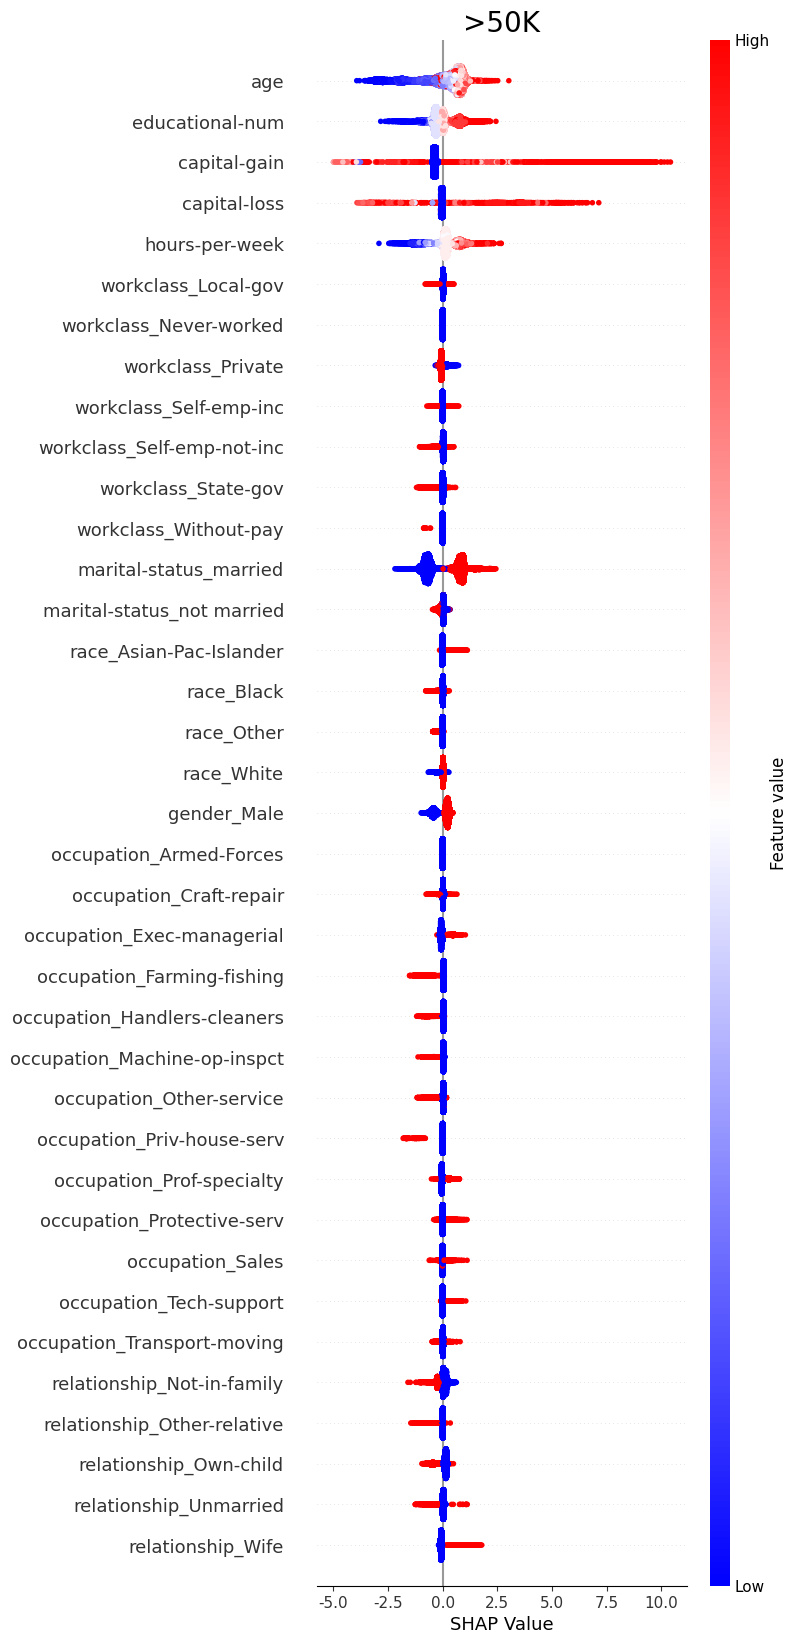

<Figure size 640x480 with 0 Axes>

In [38]:
base_explainer = shap.TreeExplainer(base_model, X_train)
base_shap_values = base_explainer.shap_values(X_train)
print(base_shap_values.shape)
plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout()
shap.summary_plot(base_shap_values, X_train,
                  feature_names=dataframe.columns, 
                 cmap='bwr', show=False,max_display=len(dataframe.columns),sort=False)
plt.xlabel('SHAP Value')
plt.title('>50K', fontsize=20)
plt.show()
plt.savefig('shap/Census_income_base.png',bbox_inches='tight')


# C>Y


In [39]:
C_train, y_train =  [l[i] for i,v in enumerate(msk) if v], y[msk]
C_test, y_test = [l[i] for i,v in enumerate(msk) if not v], y[~msk]

sc = StandardScaler()
C_train = sc.fit_transform(C_train)
C_test= sc.fit_transform(C_test)
concept_model=xgb.XGBClassifier()
concept_model.fit(C_train,y_train)

preds = concept_model.predict(C_train)

In [40]:
preds = concept_model.predict(C_test)
print(f'acc: {accuracy_score(preds,y_test)} f1: {f1_score(preds,y_test)}')
print(f'prec {precision_score(preds,y_test)} recall {recall_score(preds,y_test)}')

acc: 0.8531282051282051 f1: 0.6476377952755905
prec 0.5810154525386313 recall 0.7315175097276264


 99%|===================| 38848/39092 [01:04<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


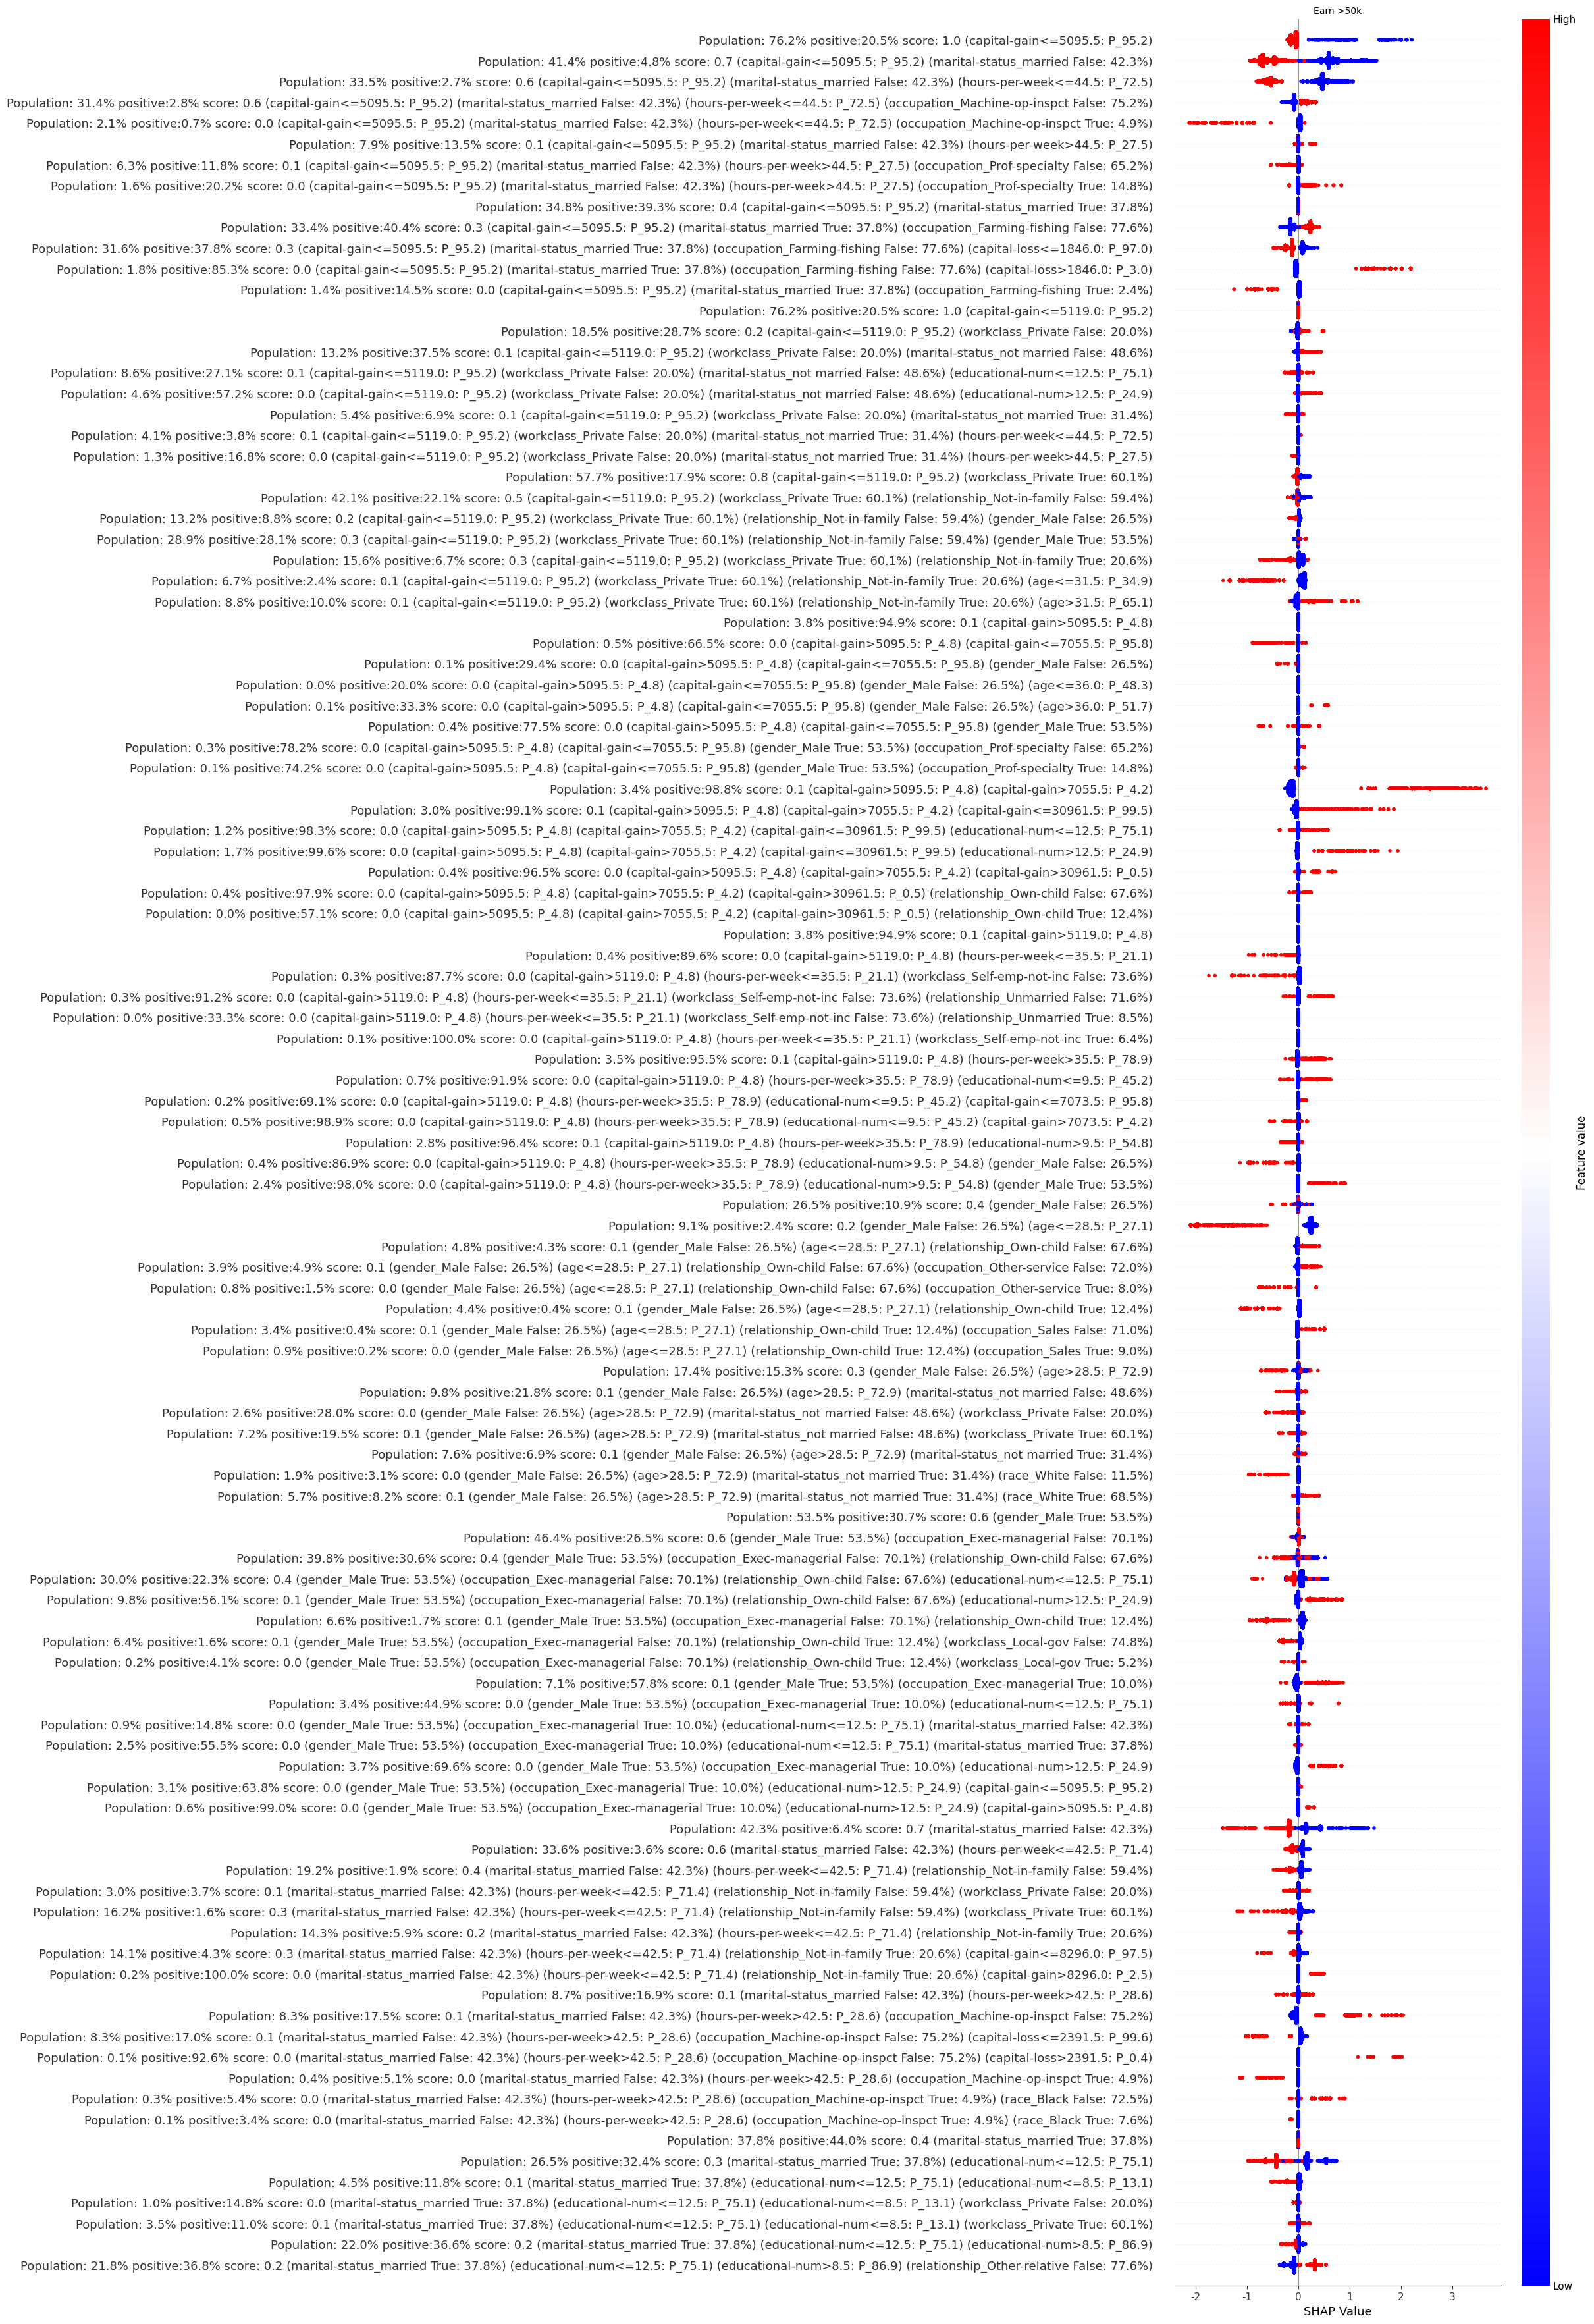

<Figure size 640x480 with 0 Axes>

In [41]:
if not os.path.exists("shap"):
    os.makedirs("shap")

plt.tight_layout()
c_explainer = shap.TreeExplainer(concept_model, C_train)
c_shap_values = c_explainer.shap_values(C_train)
plt.rcParams['axes.unicode_minus'] = False
shap.summary_plot(c_shap_values, C_train,
                  feature_names=explanations, 
                 cmap='bwr', show=False,max_display=len(rules),sort=False)
plt.xlabel('SHAP Value')
plt.title('Earn >50k', fontsize=10)
plt.show()
plt.savefig('shap/Census_income_concept.png',dpi=300,bbox_inches='tight')

In [42]:
pred_base = base_model.predict(X_train)
pred_c = concept_model.predict(C_train)
agreed = [pred_base[i] == pred_c[i] for i in range(len(pred_base))]
print(f'train {sum(agreed)/len(agreed)*100:.2f} agreed')

train 92.79 agreed


In [43]:
cur_depth = 1
for rule in sorted(rules):
    out = f'{rule}\n entropy: {1-rule_entropy_dict[rule]:.3f}, 50k Ratio: {rule_pos_neg[rule]:.2f}%, sample size: {rule_sample_num[rule]}\n'
    depth = rule_depth[rule]
    if depth != cur_depth:
        if depth <cur_depth:
            print('*************NEW TREE*****************')
        cur_depth = depth
        out+='\n'
    print(out)

(dataframe['capital-gain']<= 5095.5)  
 entropy: 0.326, 50k Ratio: 20.55%, sample size: 37223

(dataframe['capital-gain']<= 5095.5) & (dataframe['marital-status_married']<= 0.5)  
 entropy: 0.091, 50k Ratio: 4.76%, sample size: 20214


(dataframe['capital-gain']<= 5095.5) & (dataframe['marital-status_married']<= 0.5) & (dataframe['hours-per-week']<= 44.5)  
 entropy: 0.053, 50k Ratio: 2.71%, sample size: 16373


(dataframe['capital-gain']<= 5095.5) & (dataframe['marital-status_married']<= 0.5) & (dataframe['hours-per-week']<= 44.5) & (dataframe['occupation_Machine-op-inspct']<= 0.5)  
 entropy: 0.055, 50k Ratio: 2.85%, sample size: 15359


(dataframe['capital-gain']<= 5095.5) & (dataframe['marital-status_married']<= 0.5) & (dataframe['hours-per-week']<= 44.5) & (dataframe['occupation_Machine-op-inspct']> 0.5)  
 entropy: 0.014, 50k Ratio: 0.69%, sample size: 1014

*************NEW TREE*****************
(dataframe['capital-gain']<= 5095.5) & (dataframe['marital-status_married']<= 0.5) &

In [44]:
cur_depth = 1
for rule in {k: v for k, v in sorted(score_dict.items(), key=lambda item: item[1],reverse=True)}:
    out = f'{rule}\n entropy: {1-rule_entropy_dict[rule]:.3f}, 50k Ratio: {rule_pos_neg[rule]:.2f}%, sample size: {rule_sample_num[rule]}\n'
    depth = rule_depth[rule]
    if depth != cur_depth:
        if depth <cur_depth:
            print('*************NEW TREE*****************')
        cur_depth = depth
        out+='\n'
    print(out)

(dataframe['capital-gain']<= 5095.5)  
 entropy: 0.326, 50k Ratio: 20.55%, sample size: 37223

(dataframe['capital-gain']<= 5119.0)  
 entropy: 0.326, 50k Ratio: 20.55%, sample size: 37223

(dataframe['relationship_Unmarried']<= 0.5) & (dataframe['capital-gain']<= 5119.0)  
 entropy: 0.348, 50k Ratio: 22.44%, sample size: 33179


*************NEW TREE*****************
(dataframe['relationship_Unmarried']<= 0.5)  
 entropy: 0.387, 50k Ratio: 26.21%, sample size: 34955


(dataframe['capital-gain']<= 5119.0) & (dataframe['workclass_Private']> 0.5)  
 entropy: 0.294, 50k Ratio: 17.93%, sample size: 28165


(dataframe['capital-gain']<= 5095.5) & (dataframe['marital-status_married']<= 0.5)  
 entropy: 0.091, 50k Ratio: 4.76%, sample size: 20214

*************NEW TREE*****************
(dataframe['marital-status_married']<= 0.5)  
 entropy: 0.119, 50k Ratio: 6.36%, sample size: 20648


(dataframe['capital-gain']<= 5095.5) & (dataframe['marital-status_married']<= 0.5) & (dataframe['hours-per-we

In [45]:
for rule in {k: v for k, v in sorted(rule_pos_neg.items(), key=lambda item: item[1],reverse=True)}:
    out = f'{rule}, D:{rule_depth[rule]}\n entropy: {rule_entropy_dict[rule]:.3f}, pos:neg {rule_pos_neg[rule]:.2f}, sample size: {rule_sample_num[rule]}\n'
    depth = rule_depth[rule]
    if depth != cur_depth:
        if depth <cur_depth:
            print('*************NEW TREE*****************')
        cur_depth = depth
        out+='\n'
    print(out)

*************NEW TREE*****************
(dataframe['capital-gain']> 5119.0) & (dataframe['hours-per-week']<= 35.5) & (dataframe['workclass_Self-emp-not-inc']> 0.5)  , D:3
 entropy: 1.000, pos:neg 100.00, sample size: 27


(dataframe['marital-status_married']<= 0.5) & (dataframe['hours-per-week']<= 42.5) & (dataframe['relationship_Not-in-family']> 0.5) & (dataframe['capital-gain']> 8296.0)  , D:4
 entropy: 1.000, pos:neg 100.00, sample size: 117


(dataframe['capital-gain']> 5095.5) & (dataframe['capital-gain']> 7055.5) & (dataframe['capital-gain']<= 30961.5) & (dataframe['educational-num']> 12.5)  , D:4
 entropy: 0.993, pos:neg 99.65, sample size: 850

*************NEW TREE*****************
(dataframe['capital-gain']> 5095.5) & (dataframe['capital-gain']> 7055.5) & (dataframe['capital-gain']<= 30961.5)  , D:3
 entropy: 0.982, pos:neg 99.10, sample size: 1445


(dataframe['gender_Male']> 0.5) & (dataframe['occupation_Exec-managerial']> 0.5) & (dataframe['educational-num']> 12.5) & (dataf